# **Ranking Artistas Billboard.**
Se desea analizar el comportamiento de las canciones que llegaron a ser no. 1 en el Ranking Billboard para poder determinar sus principales características a través su género, tipo de artista, duración de la canción, entre otras variables y así poder tener una idea sobre cuáles son los principales drivers que ayudarán a un artista a tener posibilidad de ser parte de este prestigioso logro.
Para lograr esta labor se desea aplicar análisis y tratamiento de datos.

**1. Carga de librerías a utilizar.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Carga de datos.**

In [ ]:
bbl = pd.read_csv('artists_billboard_fix3.csv', sep = ',')

In [ ]:
bbl.head(10)

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0
5,5,Where Is At (Yep Yep),DUSTIN LYNCH,Upbeat,Medium Tempo,Traditional,Male,20140531,219.0,0,1990.0
6,6,Single Ladies (Put A Ring On It),BEYONCE,Cool,Slow Tempo,Urban,Female,20081213,43.0,1,1981.0
7,7,Me And My Broken Heart,RIXTON,Urgent,Fast Tempo,Pop,Male,20140412,557.0,0,1973.0
8,8,I Luh Ya Papi,JENNIFER LOPEZ featuring FRENCH MONTANA,Aggressive,Medium Tempo,Urban,Female,20140329,182.0,0,1969.0
9,9,Chocolate,THE 1975,Yearning,Medium Tempo,Alternative & Punk,Male,20140208,347.0,0,0.0


**3. Diccionario de datos.**
-	title: Título de la canción
-	artist: Nombre del artista
-	mood: Ánimo o modo de la canción
-	tempo: Velocidad a la que se reproduce la canción
-	genre: Género de la música
-	artist_type: Género de artista
-	chart_date: Fecha de publicación de la canción
-	durationSeg: Duración de la canción en segundos
-	top: Si la canción llegó a ser #1del Ranking (1 Sí fue; 0 No fue)
-	anioNacimiento: Año de nacimiento del artista


**4. Manipulación de datos.**

In [ ]:
bbl.shape

(635, 11)

In [ ]:
bbl.columns

Index(['id', 'title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'durationSeg', 'top', 'anioNacimiento'],
      dtype='object')

In [ ]:
# Eliminación de la variable 'id' dado que Python otorga una columna similar.
bbl.drop(['id'], axis = 1, inplace = True)
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


**5. Entendimiento de datos.**

**5.1. Análisis inicial de datos.**

In [ ]:
bbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           635 non-null    object 
 1   artist          635 non-null    object 
 2   mood            635 non-null    object 
 3   tempo           635 non-null    object 
 4   genre           635 non-null    object 
 5   artist_type     635 non-null    object 
 6   chart_date      635 non-null    int64  
 7   durationSeg     635 non-null    float64
 8   top             635 non-null    int64  
 9   anioNacimiento  635 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 49.7+ KB


**Hallazgo preliminar:** de la información previa, no existen valores nulos. Se cuenta con 6 categorías que son objetos y 4 numéricas (2 enteros, 2 flotantes).

In [ ]:
# Aunque se ha corroborado que no existen valores nulos, para llevarlo a la práctica, de cualquier modo se solicitará contar cuántos nulos hay por cada variable.
bbl.isna().sum()

,0
title,0
artist,0
mood,0
tempo,0
genre,0
artist_type,0
chart_date,0
durationSeg,0
top,0
anioNacimiento,0


In [ ]:
# Para practicar, se importará la librería missingno.
import missingno as msno

<Axes: >

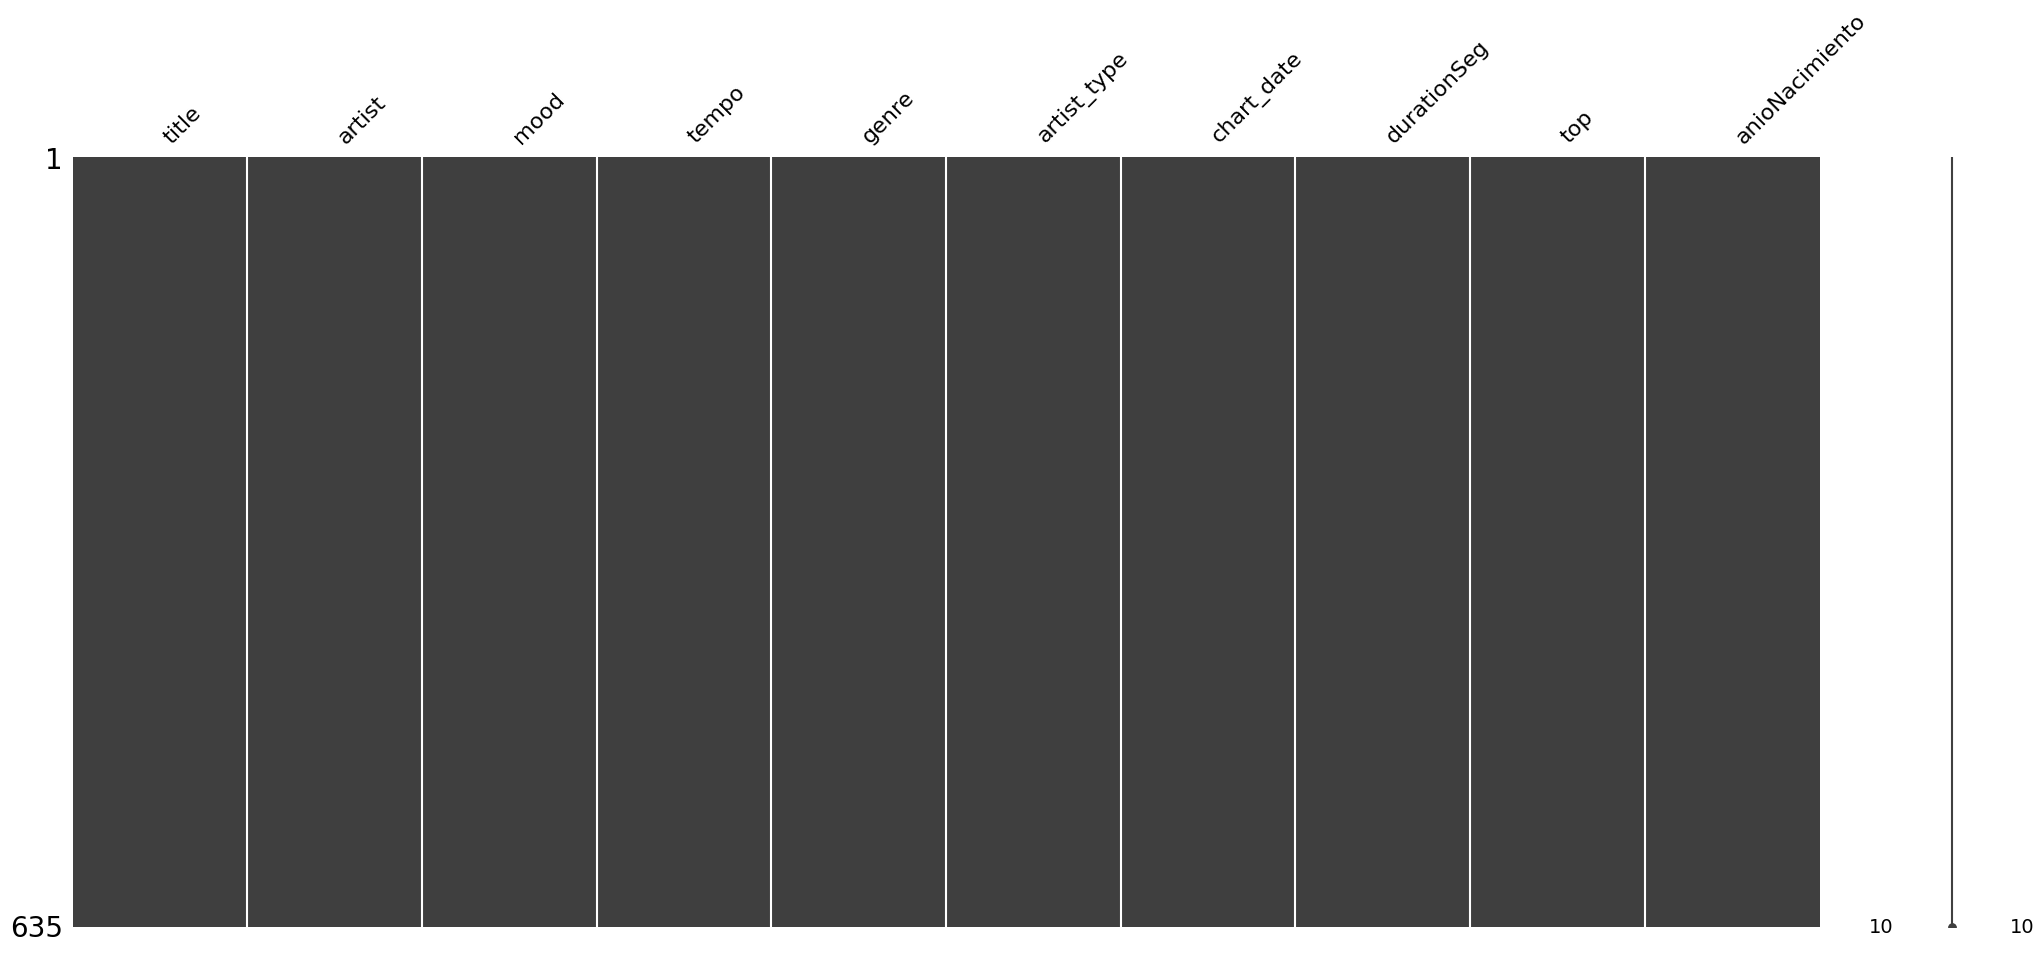

In [ ]:
# Por práctica, se creará un gráfico, donde las líneas horizontales representan la fila en la cual se encuentran los valores nulos y cómo están distribuidos.
# Como no hay nulos en la base de datos, no deberían aparecer líneas horizontales en la gráfica.
msno.matrix(bbl)

,0
top,
0,494
1,141


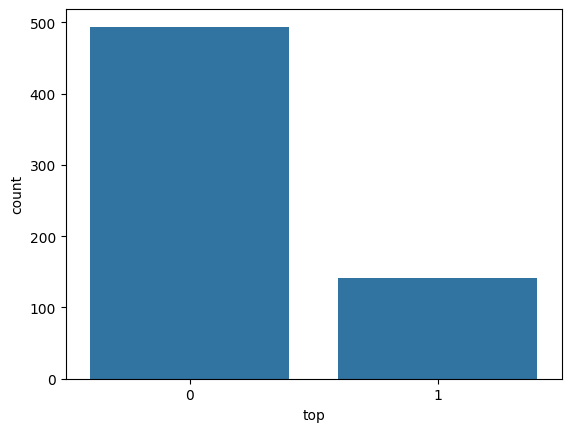

In [ ]:
# Análisis de la distribución de la variable target 'top'.
# Uso de Seaborn para graficar en barras:
sns.countplot(data = bbl, x = 'top')
# Agrupación de los datos en dos columnas:
bbl.groupby('top').size()

**Hallazgo 1:** de las 635 canciones de la lista, 141 (el ~22.2%) logró colocarse como Top 1, mientras que 494 (el ~77.8%) no lo logró.

**5.2. Variables cuantitativas.**

In [ ]:
# Cálculo de las principales medidas estadísticas, sin tomar en cuenta la variable target.
# Tampoco se consideran cuantitativas aquellas variables que provienen de variables categóricas (objetos).
bbl.describe()

,chart_date,durationSeg,top,anioNacimiento
count,6.350000e+02,635.000000,635.000000,635.000000
mean,2.013036e+07,321.768504,0.222047,1548.590551
std,2.617996e+04,633.753787,0.415950,820.470454
min,2.004021e+07,0.000000,0.000000,0.000000
25%,2.014010e+07,200.000000,0.000000,1969.000000
50%,2.014051e+07,232.000000,0.000000,1981.000000
75%,2.014101e+07,266.500000,0.000000,1986.000000
max,2.015031e+07,6840.000000,1.000000,1999.000000


In [ ]:
# Para mostrar las fechas sin exponenciales, se ha solicitado a Gemini ayuda con la creación del prompt y es el siguiente:
pd.options.display.float_format = '{:.2f}'.format
bbl.describe()

,chart_date,durationSeg,top,anioNacimiento
count,635.00,635.00,635.00,635.00
mean,20130356.30,321.77,0.22,1548.59
std,26179.96,633.75,0.42,820.47
min,20040214.00,0.00,0.00,0.00
25%,20140104.00,200.00,0.00,1969.00
50%,20140510.00,232.00,0.00,1981.00
75%,20141011.00,266.50,0.00,1986.00
max,20150307.00,6840.00,1.00,1999.00


**Hallazgo 2:** en la variable 'chart_date' se observa que la fecha de lanzamiento promedio de las canciones de la lista es marzo de 2013, siendo la canción más antigua de fecha 14 de febrero de 2004 y la más reciente de fecha 7 de marzo de 2015 (casi un periodo de 11 años analizado). La media es **mayor** que su desviación, sin embargo tiene un valor distinto a la mediana, por lo que podemos afirmar que no deberían existir valores atípicos extremos. La diferencia en meses de los cuadriles 1 al 2 y 2 al 3 es de ~4.5 meses, por lo que no deben existir valores atípicos extremos.

Hallazgo 3: con respecto a la variable 'durationSeg', el promedio es **menor** que su desviación y además se encuentra alejado de la mediana, por lo que se puede afirmar que existen valores atipicos extremos. Esto se corrobora al observar que existe un incremento de ~32 segundos de duración del cuartil 1 al 2 y del cuartil 2 al 3, pero del 3 al 4 se dispara a 6,574 segundos. Además, aunque no se detectaron valores nulos, valores de 0 ingresados en esta variable, pues el valor mínimo es de 0 segundos.  

Hallazgo 4: a pesar de que no se muestran valores nulos, sí hay ceros ingresados en la variable 'anioNacimiento', pues la fecha de nacimiento mínima es 0 y la media de 1548, cuando las fechas de las canciones van de febrero de 2012 a marzo de 2015.

In [ ]:
# Visualización de las variables 'chart_date', 'durationSeg' y 'anioNacimiento'.
Variables = ['chart_date', 'durationSeg', 'anioNacimiento']

<function matplotlib.pyplot.show(close=None, block=None)>

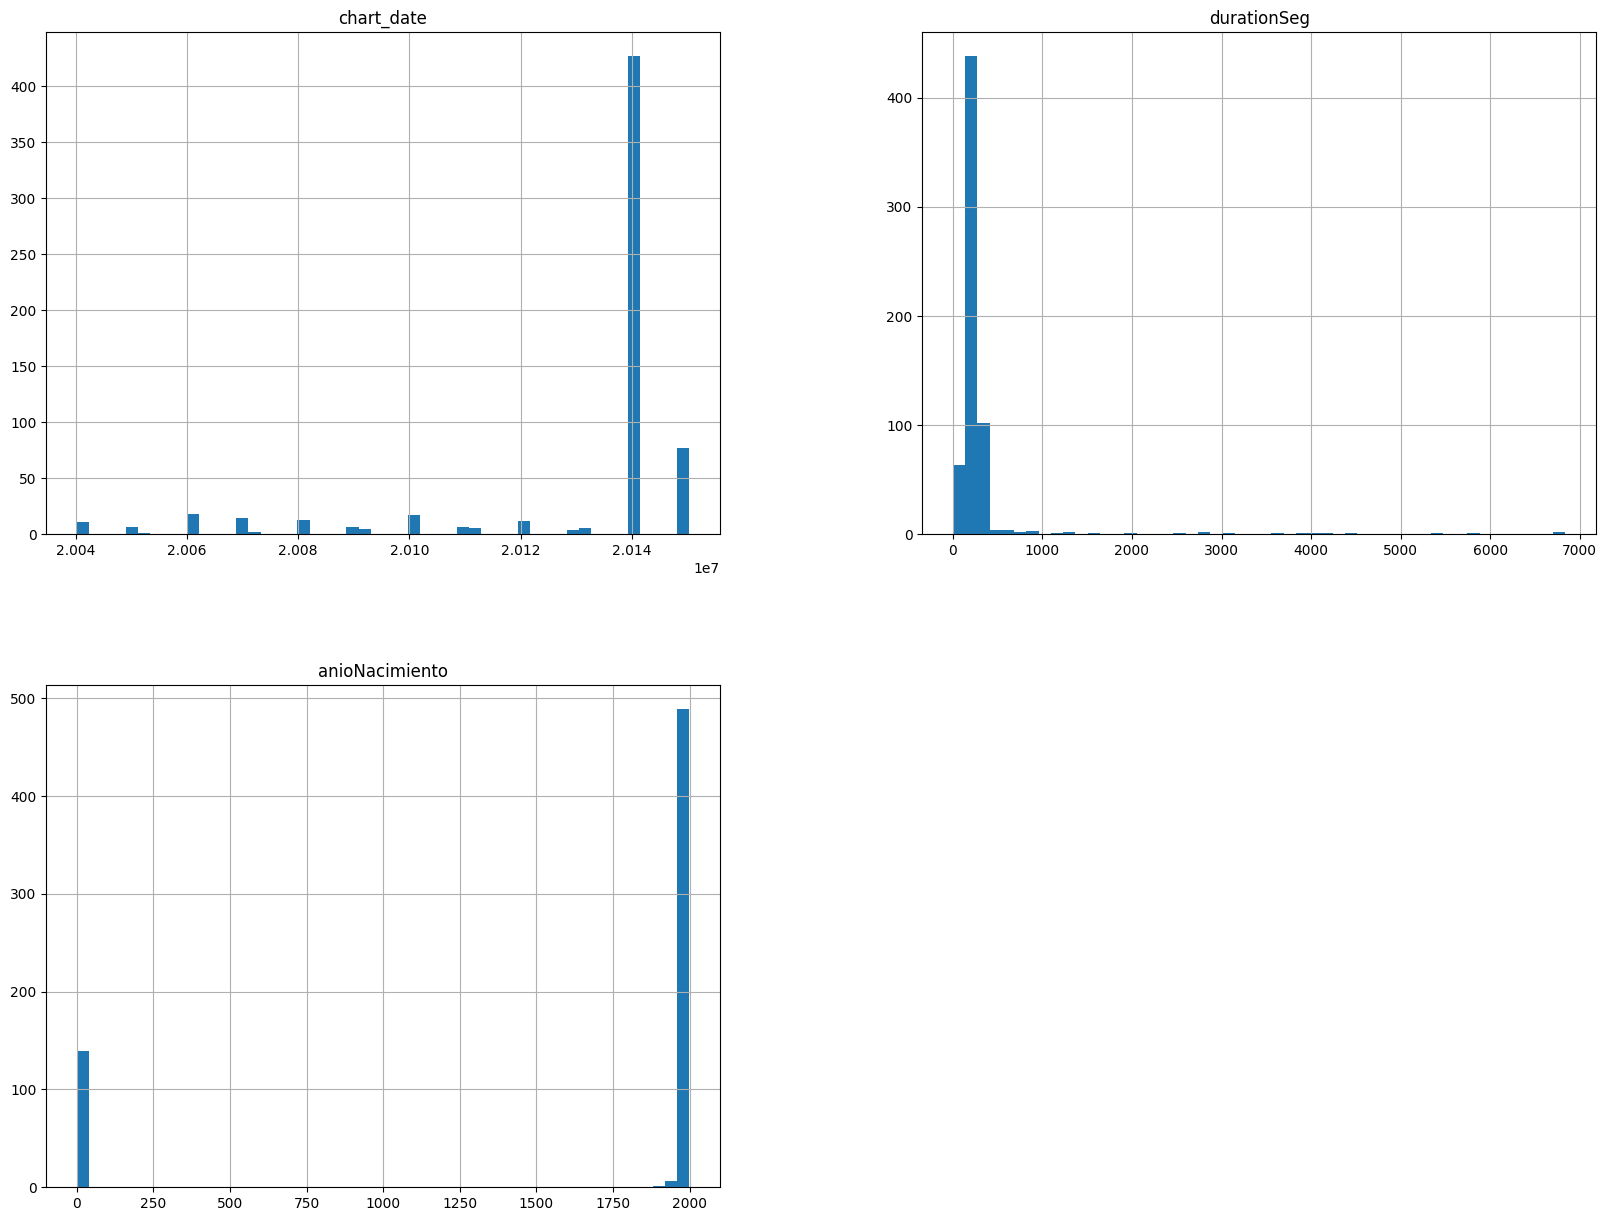

In [ ]:
# Cálculo de la distribución de las variables numéricas.
bbl[Variables].hist(bins = 50, figsize = (20,15))
plt.show

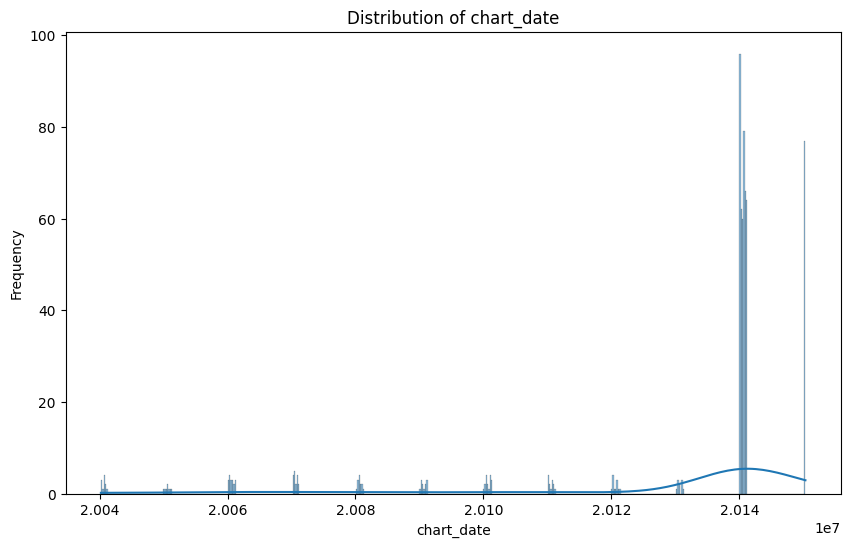

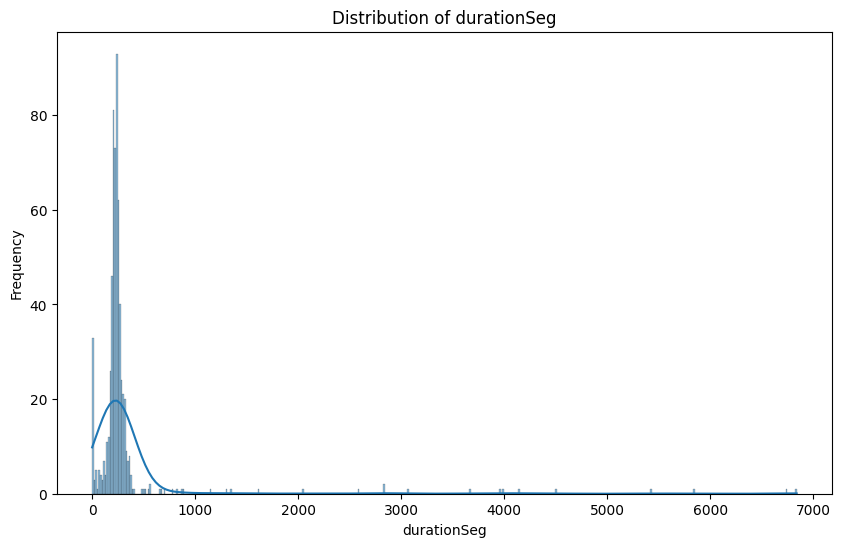

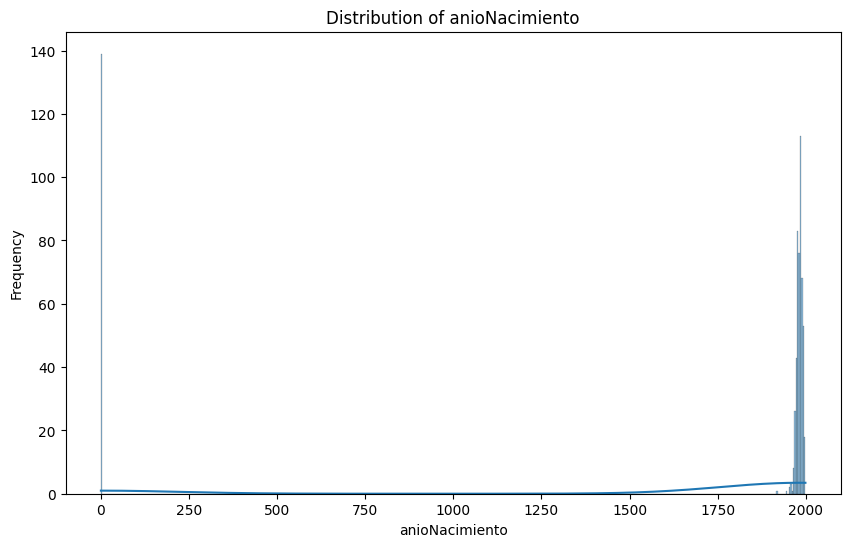

In [ ]:
# Con la ayuda de Gemini, se solicita el prompt para trazar la línea de distribución de los histogramas previos.
import matplotlib.pyplot as plt
import seaborn as sns

Variables = ['chart_date', 'durationSeg', 'anioNacimiento']

for var in Variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=bbl, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Ninguno de los 3 histogramas muestra una distribución simétrica ni aceptable, por lo que corrobora que existen valores atípicos en las variables 'chart_date', 'durationSeg' y 'anioNacimiento'.

<Axes: >

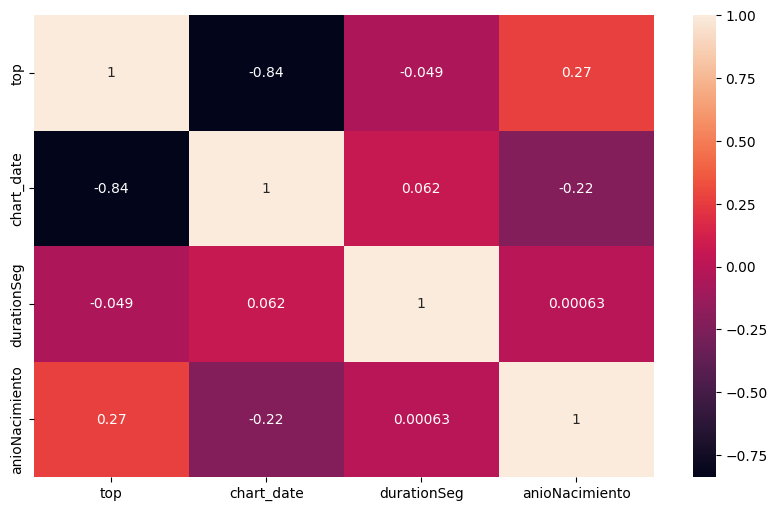

In [ ]:
# Cálculo de la correlación de las variables numéricas.
corr = bbl[['top','chart_date', 'durationSeg', 'anioNacimiento']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

Hallazgo 5: la variable numérica que tiene mayor correlación con la variable target 'top' es 'chart_date' (inversa).

**5.3. Variables categóricas.**

In [ ]:
# Filtrado de las variables categóricas.
categorical_attributes = bbl.select_dtypes(include = ['object'])

In [ ]:
categorical_attributes.dtypes

,0
title,object
artist,object
mood,object
tempo,object
genre,object
artist_type,object


In [ ]:
# Para analizar las variables categóricas, se llama a las variables 'artist' y 'top', se agrupan por 'artist', se pide el conteo, la suma y el promedio.
# Se solicita la ayuda a Gemini para ordenar la tabla de mayor a menor tomando como base la suma (de los top 1).
bbl[['artist', 'top']].groupby('artist').agg(['count', 'sum', 'mean']).sort_values(('top', 'sum'), ascending=False)

top         
                                count sum mean
artist                                        
RIHANNA                             7   7 1.00
KATY PERRY                         10   6 0.60
BRUNO MARS                          6   4 0.67
THE BLACK EYED PEAS                 3   3 1.00
BRITNEY SPEARS                      4   3 0.75
...                               ...  ..  ...
ARIANA GRANDE featuring ZEDD        1   0 0.00
AUGUST ALSINA                       1   0 0.00
AUGUST ALSINA / TRINIDAD JAMES      1   0 0.00
AUSTIN MAHONE featuring PITBULL     1   0 0.00
VANCE JOY                           1   0 0.00

[423 rows x 3 columns]

Hallazgo 6: hay artistas que colocaron varias de sus canciones en el Billboard, sin que ninguna llegara a ser Top 1, mientras que hay otros que todas sus canciones en Billboard fueron Top 1. Rihanna ha sido quien más Top 1 ha colocado, con 7 canciones en Billboard y además en Top 1 (~ el 5% de las 141 Top 1).

In [ ]:
# Se hace lo mismo para el resto de las variables.
bbl[['mood', 'top']].groupby('mood').agg(['count', 'sum', 'mean']).sort_values(('top', 'sum'), ascending=False)

top         
              count sum mean
mood                        
Energizing       71  33 0.46
Cool             78  27 0.35
Excited          62  19 0.31
Sensual          55  17 0.31
Empowering       88  10 0.11
Urgent           30   8 0.27
Yearning         68   6 0.09
Defiant          64   5 0.08
Sophisticated    15   4 0.27
Aggressive       11   3 0.27
Brooding         14   3 0.21
Rowdy            15   3 0.20
Gritty            9   2 0.22
Fiery             6   1 0.17
Easygoing         4   0 0.00
Romantic          7   0 0.00
Peaceful          4   0 0.00
Other             1   0 0.00
Melancholy       10   0 0.00
Lively            2   0 0.00
Sentimental       7   0 0.00
Upbeat           12   0 0.00
Stirring          2   0 0.00

Hallazgo 7: el mood que más canciones Top 1 ha colocado, es el 'energizing', con 23.4% del total de Top 1 y el que menos ha colocado es 'fiery' con 0.7%. Existen 9 categorías que no han colocado ni una sola canción Top 1.

In [ ]:
bbl[['tempo', 'top']].groupby('tempo').agg(['count', 'sum', 'mean']).sort_values(('top', 'sum'), ascending=False)

top          
             count  sum mean
tempo                       
Medium Tempo   517  113 0.22
Slow Tempo      65   16 0.25
Fast Tempo      53   12 0.23

Hallazgo 8: el 80% de las canciones Top 1 ha sido con medium tempo, mientras que el 11% ha sido slow tempo y el 8.5% ha sido fast tempo.

In [ ]:
bbl[['genre', 'top']].groupby('genre').agg(['count', 'sum', 'mean']).sort_values(('top', 'sum'), ascending=False)

top         
                   count sum mean
genre                            
Urban                215  71 0.33
Pop                  188  60 0.32
Alternative & Punk    60   5 0.08
Other                 12   2 0.17
Electronica           27   2 0.07
Traditional          113   1 0.01
Jazz                   2   0 0.00
Soundtrack             5   0 0.00
Rock                  13   0 0.00

Hallazgo 9: el 50.35% de las canciones Top 1 pertenece al género 'urban', descendiendo hasta el género 'traditional' solo con el 0.7%. Los géneros jazz, soundtrack y rock, no colocaron ni un solo Top 1.

In [ ]:
bbl[['artist_type', 'top']].groupby('artist_type').agg(['count', 'sum', 'mean']).sort_values(('top', 'sum'), ascending=False)

top         
            count sum mean
artist_type               
Male          387  63 0.16
Female        153  49 0.32
Mixed          95  29 0.31

Hallazgo 10: el 44.7% de los Top 1 han sido canciones interpretadas por varones, 34.7% por mujeres, y 20.6% mixtos.

**6. Tratamiento de datos.**
- Reducción de la dimensionalidad (cantidad de categorías) en caso de ser necesario.
- Aplicar un cambio de distribución de la variable numérica en caso de ser necesario para reducir los outliers extremos: Normalización, Estandarización, Tope.
- Convertir variables categóricas a numéricas.
- Seleccionar variables más importantes.

6.1. Aplicar un cambio de distribución en la variable numérica para reducir los outliers extremos (de acuerdo al hallazgo encontrando en la variable 'durationSeg').

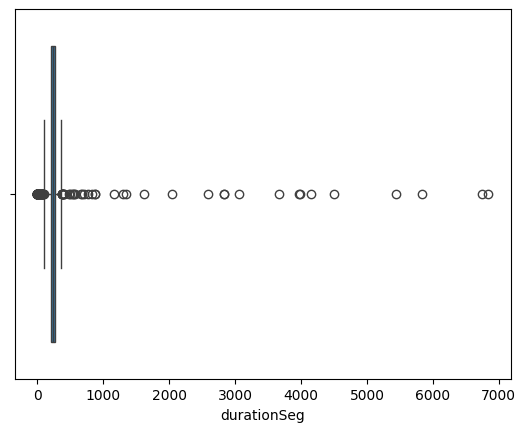

In [ ]:
#Diagrama de caja:: muestra de manera visual cómo se está distribuyendo la variable.
sns.boxplot(data=bbl,x='durationSeg')
plt.show()

In [ ]:
# Distribución de la variable por Deciles:
bbl['durationSeg'].quantile(np.arange(0,1,0.1))

,durationSeg
0.00,0.00
0.10,133.80
0.20,190.00
0.30,206.20
0.40,220.00
0.50,232.00
0.60,241.00
0.70,255.80
0.80,277.00
0.90,321.60


In [ ]:
# Los deciles hasta el 9 son aceptables, quiere decir que del decil 9 (321.60 segundos) al decil 10 (donde se encuentran los 6,840 segundos) es donde el valor ya es atípico. Ahora se analizará entre el decil 9 y el valor máximo.
# Distribución de la variable por percentiles del P90 al valor máximo, se agrega más allá del 100 (1.01) para tener los datos completos.
bbl['durationSeg'].quantile(np.arange(0.9,1.01,0.01))

,durationSeg
0.90,321.60
0.91,328.88
0.92,340.84
0.93,355.10
0.94,367.96
0.95,401.40
0.96,564.04
0.97,878.86
0.98,2216.32
0.99,3977.18


**Interpretación:**
- Existen muchos registros que se encuentran por encima del valor máximo del Diagrama de Caja, por lo que afirmamos que existen valores atípicos.
- A partir del centil 0.97 es donde la duración en segundos brinca de cientos a miles (a pesar de que 878 segundos equivalen a 14 minutos de música, sin embargo en el pasado han existido canciones con mayor duración que han estado en la lista bbl (como "In-A-Gadda-Da-Vida" de Iron Butterfly en 1969), por lo que se tomará como referencia para reducir los valores extremos.

**Técnica para reducir los outliers extremos - Tope:**

Para reducir los valores extremos, se define el percentil 0.97 como nuevo valor máximo, reemplazando por el mismo a todos los valores que se encuentran en los percentiles superiores.

In [ ]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.97))
    return(x)

In [ ]:
bbl_tratamiento = bbl[['durationSeg']].apply(lambda x: outlier_capping(x))

In [ ]:
bbl_tratamiento.head()

,durationSeg
0,191.00
1,368.00
2,223.00
3,206.00
4,232.00


In [ ]:
bbl_tratamiento.describe()

,durationSeg
count,635.00
mean,246.04
std,147.10
min,0.00
25%,200.00
50%,232.00
75%,266.50
max,878.86


Se concatena el dataframe original (bbl) con el nuevo dataframe (bbl_tratamiento), al cual se le eliminaron los valores extremos pasando del percentil 0.97, por lo que se eliminarán de la base original para contar con el nuevo campo.

In [ ]:
bbl = pd.concat([bbl.drop(columns = ['durationSeg']),bbl_tratamiento],axis = 1)

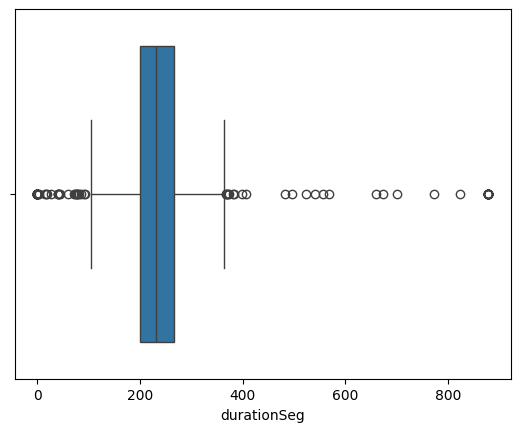

In [ ]:
# durationSeg aplicando el tope percentil a 0.97.
sns.boxplot(data = bbl, x = 'durationSeg')
plt.show()

Aunque la mediana ya se encuentra mucho más centrada dentro de la caja, aún se aprecian muchos valores dispersos. Sin embargo, por el momento se dejará así.

In [ ]:
bbl['durationSeg'].describe()

,durationSeg
count,635.00
mean,246.04
std,147.10
min,0.00
25%,200.00
50%,232.00
75%,266.50
max,878.86


Ahora, la desviación estándar ya es menor que la media, y la media y la mediana tienen valores muy parecidos.

In [ ]:
bbl.describe()

,chart_date,top,anioNacimiento,durationSeg
count,635.00,635.00,635.00,635.00
mean,20130356.30,0.22,1548.59,246.04
std,26179.96,0.42,820.47,147.10
min,20040214.00,0.00,0.00,0.00
25%,20140104.00,0.00,1969.00,200.00
50%,20140510.00,0.00,1981.00,232.00
75%,20141011.00,0.00,1986.00,266.50
max,20150307.00,1.00,1999.00,878.86


In [ ]:
# Se hará el mismo ejercicio de análisis entre el valor mínimo de 0 segundos de duración y el primer decil.
# Distribución de la variable por percentiles del valor mínimo al P10, se agrega más allá del 100 (1.01) para tener los datos completos.
bbl['durationSeg'].quantile(np.arange(0.00,0.11,0.01))

,durationSeg
0.00,0.00
0.01,0.00
0.02,0.00
0.03,0.00
0.04,0.00
0.05,11.00
0.06,41.08
0.07,76.38
0.08,92.44
0.09,115.00


Se observan valores atípicos en los primeros 5 centiles, por lo que se procede a reducir los valores extremos, definiendo el percentil 0.06 como nuevo valor mínimo, reemplazando por el mismo a todos los valores que se encuentran en los percentiles inferiores.

In [ ]:
def outlier_capping(x):
    x = x.clip(lower=x.quantile(0.06))
    return(x)

In [ ]:
bbl_tratamiento_inf = bbl[['durationSeg']].apply(lambda x: outlier_capping(x))

In [ ]:
bbl_tratamiento_inf.head()

,durationSeg
0,191.00
1,368.00
2,223.00
3,206.00
4,232.00


In [ ]:
bbl_tratamiento_inf.describe()

,durationSeg
count,635.00
mean,248.24
std,143.67
min,41.08
25%,200.00
50%,232.00
75%,266.50
max,878.86


Se concatena el dataframe original (bbl) con el nuevo dataframe (bbl_tratamiento_inf), al cual se le eliminaron los valores extremos previos al percentil 0.06, por lo que se eliminarán de la base original para contar con el nuevo campo.

In [ ]:
bbl = pd.concat([bbl.drop(columns = ['durationSeg']),bbl_tratamiento_inf],axis = 1)

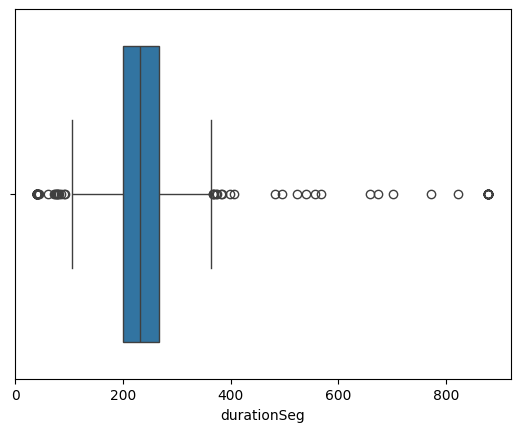

In [ ]:
# durationSeg aplicando el tope percentil inferior a 0.06.
sns.boxplot(data = bbl, x = 'durationSeg')
plt.show()

In [ ]:
bbl['durationSeg'].describe()

,durationSeg
count,635.00
mean,248.24
std,143.67
min,41.08
25%,200.00
50%,232.00
75%,266.50
max,878.86


In [ ]:
bbl.describe()

,chart_date,top,anioNacimiento,durationSeg
count,635.00,635.00,635.00,635.00
mean,20130356.30,0.22,1548.59,248.24
std,26179.96,0.42,820.47,143.67
min,20040214.00,0.00,0.00,41.08
25%,20140104.00,0.00,1969.00,200.00
50%,20140510.00,0.00,1981.00,232.00
75%,20141011.00,0.00,1986.00,266.50
max,20150307.00,1.00,1999.00,878.86


Aunque a juicio del autor las columnas chart_date y anioNacimiento son irrelevantes para el ejercicio, se analizarán dichas variables.

In [ ]:
# Se solicita la ayuda de Gemini para ejecuar un prompt que nos ayude a contar la cantidad de registros con cero como valor en las variables 'chart_date' y 'anioNacimiento'.
chart_date_zeros = bbl[bbl['chart_date'] == 0].shape[0]
anioNacimiento_zeros = bbl[bbl['anioNacimiento'] == 0].shape[0]

print(f"Number of records with 0 in 'chart_date': {chart_date_zeros}")
print(f"Number of records with 0 in 'anioNacimiento': {anioNacimiento_zeros}")

Number of records with 0 in 'chart_date': 0
Number of records with 0 in 'anioNacimiento': 139


Hallazgo 11: de los 635 registros, existen 139 con valor cero ingresado como fecha de nacimiento (~21.88%). Como la variable no presenta dispersión extrema, se utilizará el valor de la mediana como referencia para reemplazar los valores en cero. Se usará la mediana porque es más robusta que la media, sobretodo ante valores atípicos.

In [ ]:
# Distribución de la variable por Deciles:
bbl['anioNacimiento'].quantile(np.arange(0,1,0.1))

,anioNacimiento
0.00,0.00
0.10,0.00
0.20,0.00
0.30,1973.00
0.40,1977.00
0.50,1981.00
0.60,1983.00
0.70,1985.00
0.80,1988.00
0.90,1992.00


In [ ]:
# Cálculo de la mediana para la variable 'anioNacimiento'
mediana_anioNacimiento = bbl['anioNacimiento'].median()
mediana_anioNacimiento

1981.0

In [ ]:
# Reemplazo de los ceros por la mediana:
bbl['anioNacimiento'] = bbl['anioNacimiento'].replace(0, mediana_anioNacimiento)

In [ ]:
bbl.describe()

,chart_date,top,anioNacimiento,durationSeg
count,635.00,635.00,635.00,635.00
mean,20130356.30,0.22,1982.23,248.24
std,26179.96,0.42,7.40,143.67
min,20040214.00,0.00,1919.00,41.08
25%,20140104.00,0.00,1979.00,200.00
50%,20140510.00,0.00,1981.00,232.00
75%,20141011.00,0.00,1986.00,266.50
max,20150307.00,1.00,1999.00,878.86


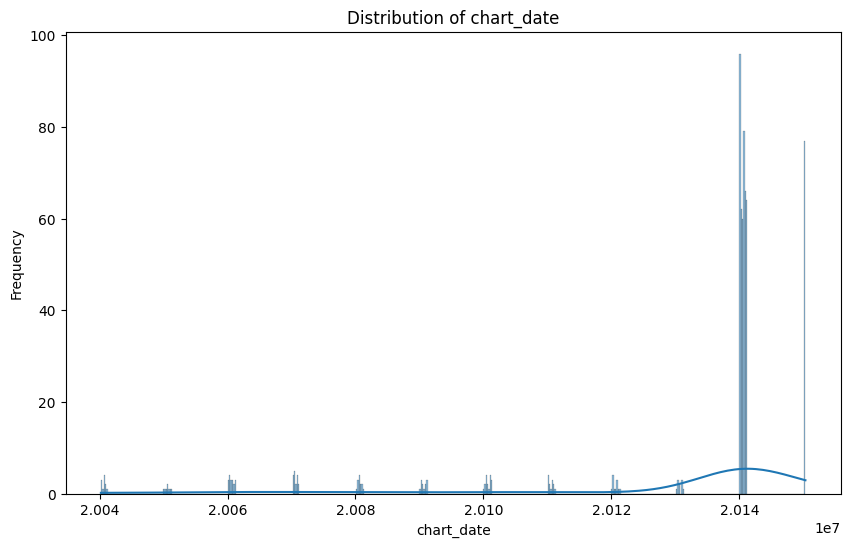

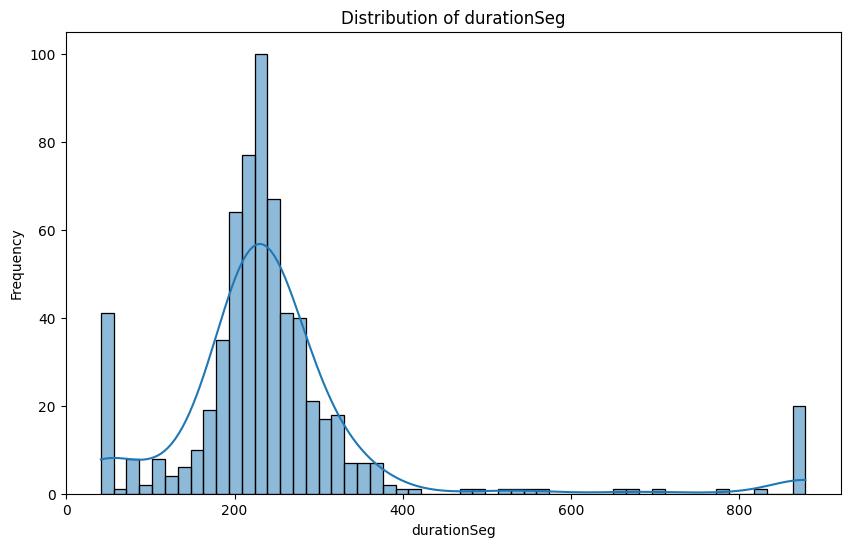

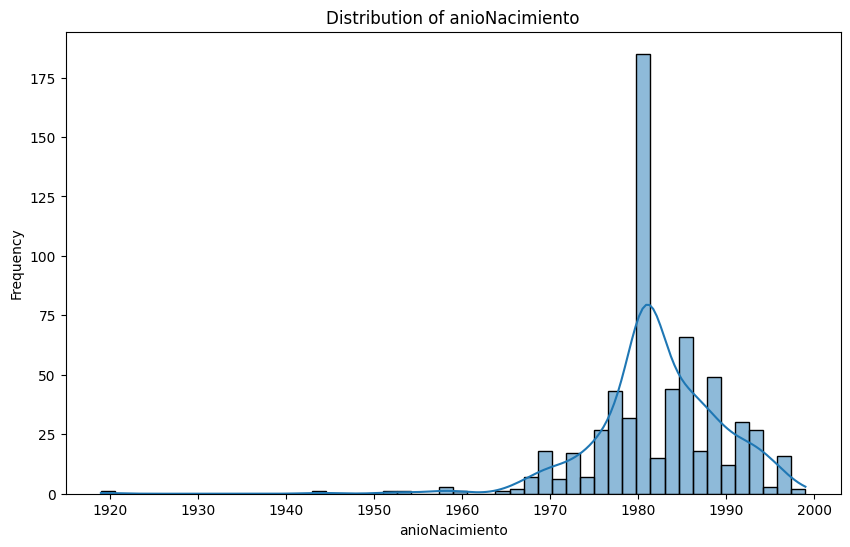

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Variables = ['chart_date', 'durationSeg', 'anioNacimiento']

for var in Variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=bbl, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

6.2. Recategorizar las variables numéricas.

In [ ]:
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.00,191.00
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.00,368.00
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.00,223.00
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.00,206.00
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,1981.00,232.00


Por ejercicio se practicará la transformación de reescalado para la variable 'durationSeg'.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

bbl["durationSeg_norm"] = scaler.fit_transform(bbl[["durationSeg"]])

In [ ]:
bbl.describe()

,chart_date,top,anioNacimiento,durationSeg,durationSeg_norm
count,635.00,635.00,635.00,635.00,635.00
mean,20130356.30,0.22,1982.23,248.24,0.25
std,26179.96,0.42,7.40,143.67,0.17
min,20040214.00,0.00,1919.00,41.08,0.00
25%,20140104.00,0.00,1979.00,200.00,0.19
50%,20140510.00,0.00,1981.00,232.00,0.23
75%,20141011.00,0.00,1986.00,266.50,0.27
max,20150307.00,1.00,1999.00,878.86,1.00


In [ ]:
# Recategorización de variables en rangos de fechas de nacimiento con valores:
bbl.loc[ bbl['anioNacimiento'] < 1979, 'anioNacimientoEncoded'] 					                         = 0 # Primer cuadril
bbl.loc[(bbl['anioNacimiento'] >= 1979) & (bbl['anioNacimiento'] < 1981), 'anioNacimientoEncoded'] = 1 # Segundo cuadril
bbl.loc[(bbl['anioNacimiento'] >= 1981) & (bbl['anioNacimiento'] < 1986), 'anioNacimientoEncoded'] = 2 # Tercer cuadril
bbl.loc[ bbl['anioNacimiento'] >= 1986, 'anioNacimientoEncoded'] 					                         = 3 # Cuarto cuadril

In [ ]:
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,durationSeg_norm,anioNacimientoEncoded
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.00,191.00,0.18,0.00
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.00,368.00,0.39,3.00
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.00,223.00,0.22,3.00
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.00,206.00,0.20,3.00
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,1981.00,232.00,0.23,2.00


In [ ]:
# Recategorización de variables en rangos de años de lanzamiento con valores:
bbl.loc[ bbl['chart_date'] < 20140100, 'chart_dateEncoded'] 					                         = 0 # Primer cuadril
bbl.loc[(bbl['chart_date'] >= 20140100) & (bbl['chart_date'] < 20140500), 'chart_dateEncoded'] = 1 # Segundo cuadril
bbl.loc[(bbl['chart_date'] >= 20140500) & (bbl['chart_date'] < 20141000), 'chart_dateEncoded'] = 2 # Tercer cuadril
bbl.loc[ bbl['chart_date'] >= 20141000, 'chart_dateEncoded']                                   = 3 # Cuarto cuadril

In [ ]:
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,durationSeg_norm,anioNacimientoEncoded,chart_dateEncoded
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.00,191.00,0.18,0.00,2.00
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.00,368.00,0.39,3.00,2.00
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.00,223.00,0.22,3.00,1.00
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.00,206.00,0.20,3.00,1.00
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,1981.00,232.00,0.23,2.00,1.00


6.3. Convertir variables categóricas a numéricas.

In [ ]:
# 'mood' 'tempo' 'genre' 'artist_type'

In [ ]:
# artist_type
bbl['artist_typeEncoded'] = bbl['artist_type'].map( {'Female': 1, 'Male': 2, 'Mixed': 3} ).astype(int)

In [ ]:
# genre
bbl['genreEncoded'] = bbl['genre'].map( {'Urban': 1, 'Pop': 2, 'Alternative & Punk': 3, 'Other': 4, 'Electronica': 5, 'Traditional': 6, 'Jazz': 7, 'Soundtrack': 8, 'Rock': 9} ).astype(int)

In [ ]:
# tempo
bbl['tempoEncoded'] = bbl['tempo'].map( {'Slow Tempo': 1, 'Medium Tempo': 2, 'Fast Tempo': 3} ).astype(int)

In [ ]:
# mood
bbl['moodEncoded'] = bbl['mood'].map( { 'Brooding': 1, 'Energizing': 2, 'Excited': 3, 'Yearning': 4, 'Upbeat': 5, 'Cool': 6, 'Urgent': 7, 'Aggressive': 8, 'Sophisticated': 9, 'Defiant': 10,
'Sensual': 11, 'Empowering': 12, 'Gritty': 13, 'Romantic': 14, 'Rowdy': 15, 'Other': 16, 'Fiery': 17, 'Sentimental': 18, 'Easygoing': 19, 'Stirring': 20, 'Melancholy': 21, 'Peaceful': 22, 'Lively': 23} ).astype(int)

Con la finalidad de poner en práctica los conocimientos de la clase, se creará una copia de la columna 'artist' para desecharla después.

In [ ]:
bbl['artist_copy'] = bbl['artist']

In [ ]:
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,durationSeg_norm,anioNacimientoEncoded,chart_dateEncoded,artist_typeEncoded,genreEncoded,tempoEncoded,moodEncoded,artist_copy
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.00,191.00,0.18,0.00,2.00,2,6,2,1,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.00,368.00,0.39,3.00,2.00,1,2,2,2,"JESSIE J, ARIANA GRANDE & NICKI MINAJ"
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.00,223.00,0.22,3.00,1.00,3,1,2,3,PITBULL featuring KE$HA
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.00,206.00,0.20,3.00,1.00,2,3,2,1,THE NEIGHBOURHOOD
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,1981.00,232.00,0.23,2.00,1.00,1,6,2,4,MIRANDA LAMBERT


In [ ]:
# Eliminación de la columna 'artis_copy'.
bbl.drop(['artist_copy'], axis = 1, inplace = True)
bbl.head()

,title,artist,mood,tempo,genre,artist_type,chart_date,top,anioNacimiento,durationSeg,durationSeg_norm,anioNacimientoEncoded,chart_dateEncoded,artist_typeEncoded,genreEncoded,tempoEncoded,moodEncoded
0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,0,1975.00,191.00,0.18,0.00,2.00,2,6,2,1
1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,0,1989.00,368.00,0.39,3.00,2.00,1,2,2,2
2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,1,1993.00,223.00,0.22,3.00,1.00,3,1,2,3
3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,0,1989.00,206.00,0.20,3.00,1.00,2,3,2,1
4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,0,1981.00,232.00,0.23,2.00,1.00,1,6,2,4


6.4 Selección de variables.

In [ ]:
bbl.columns

Index(['title', 'artist', 'mood', 'tempo', 'genre', 'artist_type',
       'chart_date', 'top', 'anioNacimiento', 'durationSeg',
       'durationSeg_norm', 'anioNacimientoEncoded', 'chart_dateEncoded',
       'artist_typeEncoded', 'genreEncoded', 'tempoEncoded', 'moodEncoded'],
      dtype='object')

Creación de una nueva lista que no incluya las variables que no se considerarán en el modelo, ya sea porque cuentan con su versión codificada, están duplicadas o no existe criterio para ingresarlas.

In [ ]:
drop_elements = ['title', 'artist', 'mood', 'tempo', 'genre', 'artist_type','chart_date', 'anioNacimiento', 'durationSeg']
bbl_encoded = bbl.drop(drop_elements, axis = 1)

In [ ]:
bbl_encoded.head(3)

,top,durationSeg_norm,anioNacimientoEncoded,chart_dateEncoded,artist_typeEncoded,genreEncoded,tempoEncoded,moodEncoded
0,0,0.18,0.00,2.00,2,6,2,1
1,0,0.39,3.00,2.00,1,2,2,2
2,1,0.22,3.00,1.00,3,1,2,3


<Axes: >

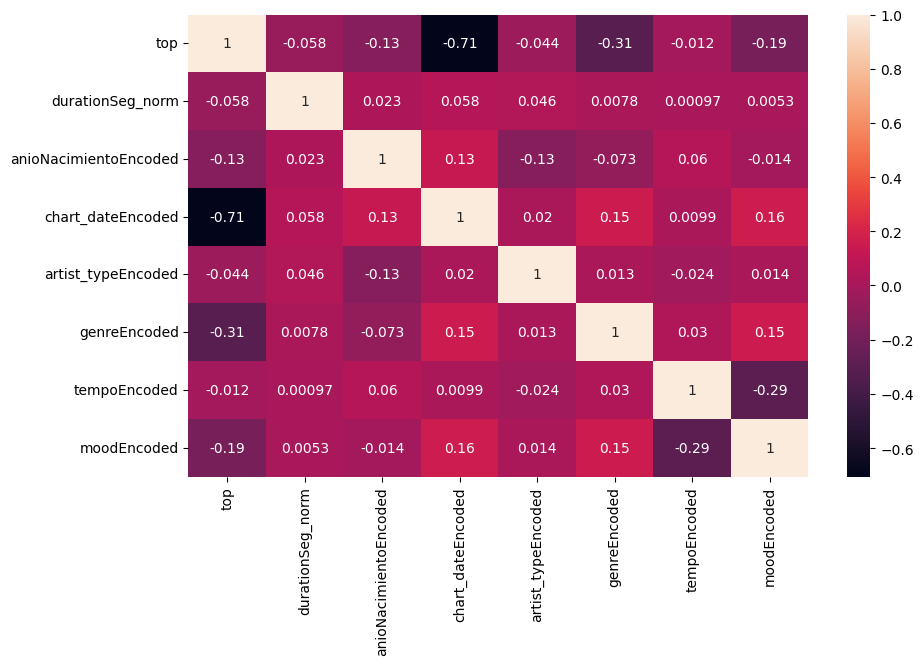

In [ ]:
# Cálculo de la correlación de variables numéricas para poder elegir las que se relacionan más con la variable target.
corr = bbl_encoded.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.feature_selection import SelectKBest

# Variables Independientes
x = bbl_encoded.drop(['top'], axis=1)
# Variable dependiente (Target)
y = bbl_encoded['top']

best=SelectKBest(k=5) # Coloca la cantidad de variables a tomar en cuenta
x_new = best.fit_transform(x, y)
x_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['durationSeg_norm', 'anioNacimientoEncoded', 'chart_dateEncoded',
       'genreEncoded', 'moodEncoded'],
      dtype='object')


**7. Balanceo de datos.**

7.1. Train / test.

In [ ]:
# Variables Independientes
x = bbl_encoded[['durationSeg_norm', 'anioNacimientoEncoded', 'chart_dateEncoded','genreEncoded', 'moodEncoded']]
# Variable Dependiente (target)
y = bbl_encoded[['top']]

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.80, random_state=1369)

7.2. Concatenar Train.

In [ ]:
# Unificación de los bloques de Train para realizar el Balanceo de Datos.
bbl_train = pd.concat([x_train,y_train],axis=1)

In [ ]:
bbl_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, 63 to 455
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   durationSeg_norm       508 non-null    float64
 1   anioNacimientoEncoded  508 non-null    float64
 2   chart_dateEncoded      508 non-null    float64
 3   genreEncoded           508 non-null    int64  
 4   moodEncoded            508 non-null    int64  
 5   top                    508 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 27.8 KB


In [ ]:
# División entre máquinas con intensidad de pico.
count_class_0, count_class_1 = bbl_train.top.value_counts()

# Divide by class
bbl_class_0 = bbl_train[bbl_train['top'] == 0]
bbl_class_1 = bbl_train[bbl_train['top'] == 1]

In [ ]:
count_class_0, len(bbl_class_0), count_class_1, len(bbl_class_1) # La cantidad de casos no debe variar.

(396, 396, 112, 112)

7.3 Undersampling.

In [ ]:
bbl_class_0_under = bbl_class_0.sample(count_class_1,random_state=1369) # Existen suficientes casos para que la proporción final sea 50/50.

Random under-sampling:
top
0    112
1    112
Name: count, dtype: int64


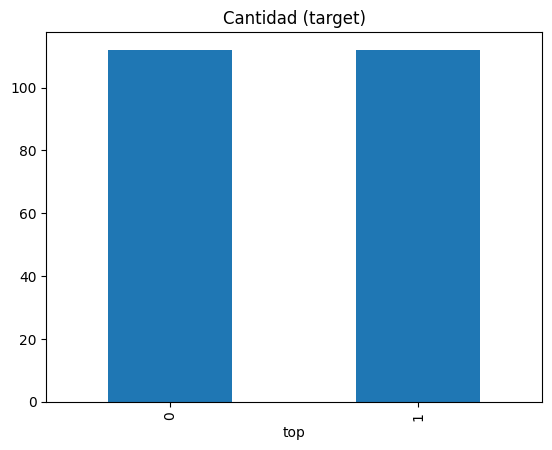

In [ ]:
# Existe cierto riesgo de que algunas filas no sean consideradas porque la aleatoriedad las ignorará.
bbl_train_under = pd.concat([bbl_class_0_under, bbl_class_1], axis=0)

print('Random under-sampling:')
print(bbl_train_under.top.value_counts())

bbl_train_under.top.value_counts().plot(kind='bar', title='Cantidad (target)');

7.4. Oversampling.

In [ ]:
bbl_class_1_over = bbl_class_1.sample(count_class_0, replace=True, random_state = 1369) # OJO: Importante que se coloque el parámetro replace = True.

Random over-sampling:
top
0    396
1    396
Name: count, dtype: int64


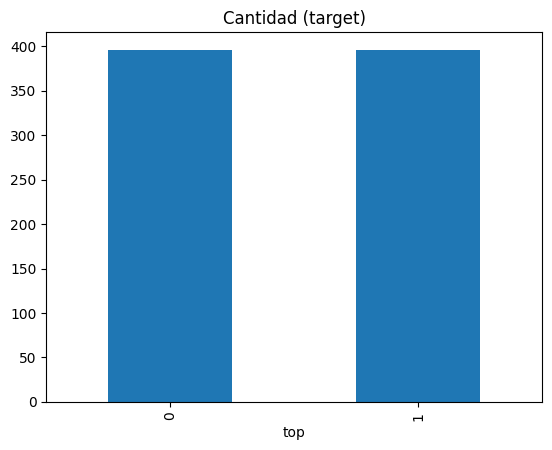

In [ ]:
# Existe cierto riesgo de que algunas filas no sean consideradas porque la aleatoriedad las ignorará.
bbl_train_over = pd.concat([bbl_class_0, bbl_class_1_over], axis=0)

print('Random over-sampling:')
print(bbl_train_over.top.value_counts())

bbl_train_over.top.value_counts().plot(kind='bar', title='Cantidad (target)');

**Ya se tienen los tres escenarios de balanceo: el original, undersampling y oversampling.**

In [ ]:
#Train Original
bbl_train.top.value_counts()

,count
top,
0,396
1,112


In [ ]:
#Train Undersampling
bbl_train_under.top.value_counts()

,count
top,
0,112
1,112


In [ ]:
#Train Oversampling
bbl_train_over.top.value_counts()

,count
top,
0,396
1,396


**Estos datos ya tratados, van para el modelado.**